# Capacity Building
## Prerequites
Some basic understanding of python variables, data types, looping, conditionals and functions is required.
## Data inputs
### Import modules/packages

Let's import some modules/packages. A module/package is pre-built python code that we can leverage to provide useful functionality.
Generally it will have the form of *module_name.function*

In [77]:
import pandas as pd # pd is an alias for pandas. This is similar to dataframes in R.
import matplotlib.pyplot as plt # matplotlib is the defacto visualisation package for python.
from datetime import datetime, timedelta # We also use datetime to manipulate date-time indexes.

plt.style.use('ggplot') # This sets the style of the plots. 


Try: There's a function inside plt.style that will show the styles. Change the plotting style to something you like.

### Define constants
Defining and capitalising constants is recommended at the start of a Python script.

In [78]:
# URL to the Ministry of health's GitHub repository.
# What is the data type here, a tuple or string? Do you know how to check for the type?
GITHUB_MOH = (
    "https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/"
)

# A list containing the files to download.
FILES = [
    "cases_malaysia",
    "deaths_malaysia",
    "hospital",
    "icu",
    "cases_state",
    "deaths_state",
]

# By defining a region parameter we can easily change the analysis later.
REGION = "Malaysia"

# We define a day zero for the analysis.
COVID_BASE_DATE = datetime(2019, 12, 31)


### Utility functions

In [79]:
def fetch_mys_data(a_url:str)->pd.DataFrame:
    """Request files from MoH and combine them into one data frame.
    Args:
        a_url (str): A url to fetch data from.

    Returns:
        pd.DataFrame: A data frame containing all the files.
    """
    a_list = [] # A empty list to hold each data frame. (a list can hold any python object)
    for file in FILES: # Loop over each file name.
        data_type = file.split('_')[0] # Split the file name on '_' and take the first part.
        df = pd.read_csv(a_url + file + ".csv") # Build the full url path to the file and ask pandas to download it. 
        df['type']  = data_type # Create a new column 'type' and enter the data_type.

        a_list.append(df) # Place this dataframe into the list. 

    # We have looped over all the files, downloaded and entered it into a list of shape [df1,df2,df3,...].
    
    # Pandas will automatically combine this list into single dataframe. It will expand the rows and the columns as necessary.
    df = pd.concat(a_list) 
    
    return df # The function returns the dataframe.

Now call the function and pass it the MoH url.<br> Well done! We have scraped the entire national and regional Covid-19 dataset of Malaysia into one dataframe.

In [80]:
df = fetch_mys_data(GITHUB_MOH)
df

,date,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,...,vent,vent_port,icu_covid,icu_pui,icu_noncovid,vent_covid,vent_pui,vent_noncovid,vent_used,vent_port_used
0,2020-01-25,4.0,4.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-26,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-27,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-28,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-29,3.0,3.0,0.0,7.0,0.0,3.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13003,2022-06-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13004,2022-06-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13005,2022-06-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13006,2022-06-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df.columns


Index(['date', 'cases_new', 'cases_import', 'cases_recovered', 'cases_active',
       'cases_cluster', 'cases_unvax', 'cases_pvax', 'cases_fvax',
       'cases_boost', 'cases_child', 'cases_adolescent', 'cases_adult',
       'cases_elderly', 'cases_0_4', 'cases_5_11', 'cases_12_17',
       'cases_18_29', 'cases_30_39', 'cases_40_49', 'cases_50_59',
       'cases_60_69', 'cases_70_79', 'cases_80', 'cluster_import',
       'cluster_religious', 'cluster_community', 'cluster_highRisk',
       'cluster_education', 'cluster_detentionCentre', 'cluster_workplace',
       'type', 'deaths_new', 'deaths_bid', 'deaths_new_dod', 'deaths_bid_dod',
       'deaths_unvax', 'deaths_pvax', 'deaths_fvax', 'deaths_boost',
       'deaths_tat', 'state', 'beds', 'beds_covid', 'beds_noncrit',
       'admitted_pui', 'admitted_covid', 'admitted_total', 'discharged_pui',
       'discharged_covid', 'discharged_total', 'hosp_covid', 'hosp_pui',
       'hosp_noncovid', 'beds_icu', 'beds_icu_rep', 'beds_icu_total',
 

In [81]:
df['state']

0                      NaN
1                      NaN
2                      NaN
3                      NaN
4                      NaN
               ...        
13003             Selangor
13004           Terengganu
13005    W.P. Kuala Lumpur
13006          W.P. Labuan
13007       W.P. Putrajaya
Name: state, Length: 53512, dtype: object

We need to do some housekeeping.
- Fill the missing state values with 'Malaysia'
- Ensure the date type is correct and not a string '10-06-2022'
- Create a integer offset from COVID_BASE_DATE. 

In [82]:
df.loc[df['state'].isna(), 'state'] = 'Malaysia' 
df['date'] = pd.to_datetime(df['date'])
df['date_index'] = (df['date'] - COVID_BASE_DATE).dt.days

Let's create a boolean mask to aid with our analysis. Recall the 'REGION' variable we set at the beginning and the type column we created while downloading the data.<br>

We define a FILTER. In this example it's for Malaysia's cases. By changing the 'REGION' variable and or type column, we can change the focus of the analysis.

In [84]:
FILTER = (df['state'] == REGION) & (df['type'] == 'cases')

In [88]:
df[FILTER][['date', 'cases_new','deaths_new']] # Notice how the death data is NaN due to the filtering.

,date,cases_new,deaths_new
0,2020-01-25,4.0,NaN
1,2020-01-26,0.0,NaN
2,2020-01-27,0.0,NaN
3,2020-01-28,0.0,NaN
4,2020-01-29,3.0,NaN
...,...,...,...
860,2022-06-03,1844.0,NaN
861,2022-06-04,1591.0,NaN
862,2022-06-05,1358.0,NaN
863,2022-06-06,1330.0,NaN


After all that work let's a have a look at the results.<br />
Pandas has a .plot() function. Here is a [quick](https://pandas.pydata.org/docs/getting_started/intro_tutorials/04_plotting.html) or [detailed](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html?highlight=plot) tutorial.<br />
We can also use `x='date_index` and change the `y` to any `case_` column.

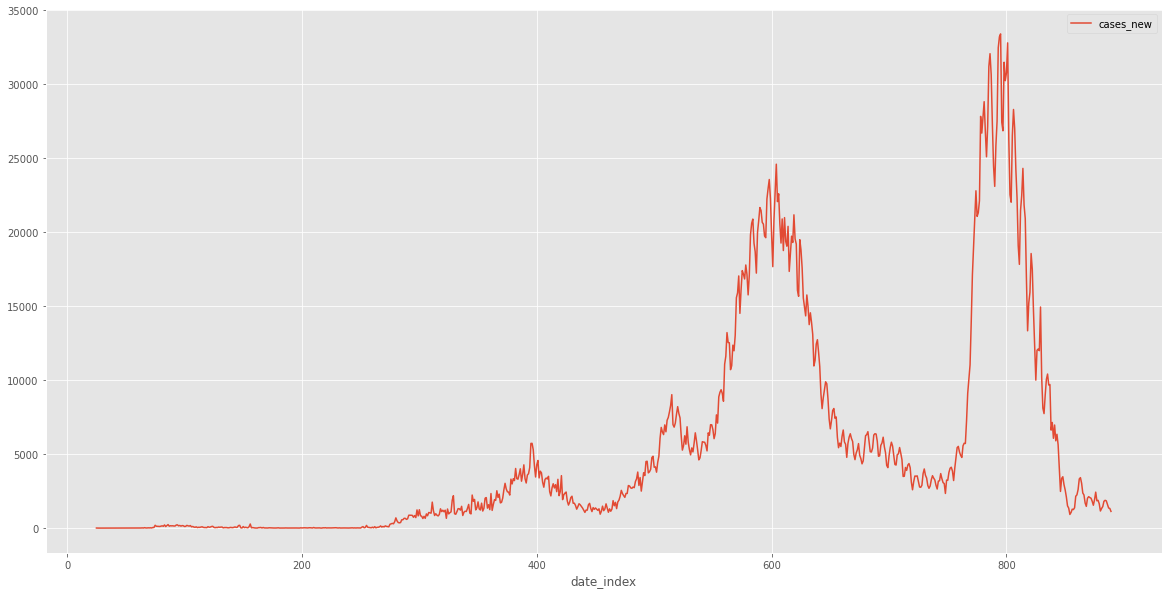

In [94]:
df[FILTER].plot(x='date_index', y='cases_new', figsize=(20, 10));

Let's also download the latest population distributions from the MoH GitHub repository.

In [33]:
POPULATION = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/static/population.csv'
df_pop = pd.read_csv(POPULATION)

In [93]:
df_pop

,state,idxs,pop,pop_18,pop_60,pop_12,pop_5
0,Malaysia,0,32657100,23528200,3649000,3111400,3550500
1,Johor,1,3794200,2733400,445600,353900,409800
2,Kedah,2,2193600,1554800,282300,209700,254100
3,Kelantan,3,1928900,1258700,202100,211200,271700
4,Melaka,4,937800,683700,123200,85600,98200
5,Negeri Sembilan,5,1128900,819200,150300,105900,117200
6,Pahang,6,1684700,1188000,198100,172000,192600
7,Pulau Pinang,7,1774200,1374300,247600,139400,155600
8,Perak,8,2509000,1878100,410000,228000,239700
9,Perlis,9,255500,182100,36300,23000,29100


In [34]:
initial_population = df_pop[df_pop['state'] == REGION]['pop'][0]

## Basic model introduction

This page introduces the processes for building and running a simple compartmental disease model with Summer.
In the following example, we will create an SIR compartmental model for a general, unspecified emerging infectious disease spreading through a fully susceptible population. In this model there will be:

- three compartments: susceptible (S), exposed(E), infected (I) and recovered (R)
- a starting population of the REGION, with 100 of them infected (and infectious)
- an evaluation timespan from day zero to END_DATE in 0.1 day steps
- inter-compartmental flows for infection, deaths and recovery

First, let's look at a complete example of this model in action, and then examine the details of each step. This is the complete example model that we will be working with:

In [100]:
import numpy as np
from summer import CompartmentalModel
START_DATE = datetime(2021,1,1) 
END_DATE = START_DATE + timedelta(days=300)

START_DATE_INT = (START_DATE- COVID_BASE_DATE).days
END_DATE_INT = (END_DATE- COVID_BASE_DATE).days

In [101]:
# Define the model
model = CompartmentalModel(
    times=(START_DATE_INT, END_DATE_INT),
    compartments=["S", "E", "I", "R"],
    infectious_compartments=["I"],
    timestep=0.1,
)

In [102]:

model.set_initial_population(distribution={"S": 100000, "E": 0, "I": 100})
model.add_infection_frequency_flow(name="exposure", contact_rate=0.12, source="S", dest="E")
model.add_transition_flow(name="infection", fractional_rate=1/15, source="E", dest="I")
model.add_transition_flow(name="recovery", fractional_rate=0.04, source="I", dest="R")
#model.add_death_flow(name="infection_death", death_rate=0.05, source="I")

# Run the model
model.run()


In [103]:
target = df[FILTER][START_DATE_INT:END_DATE_INT]['cases_new']
xrange = range(START_DATE_INT,END_DATE_INT)

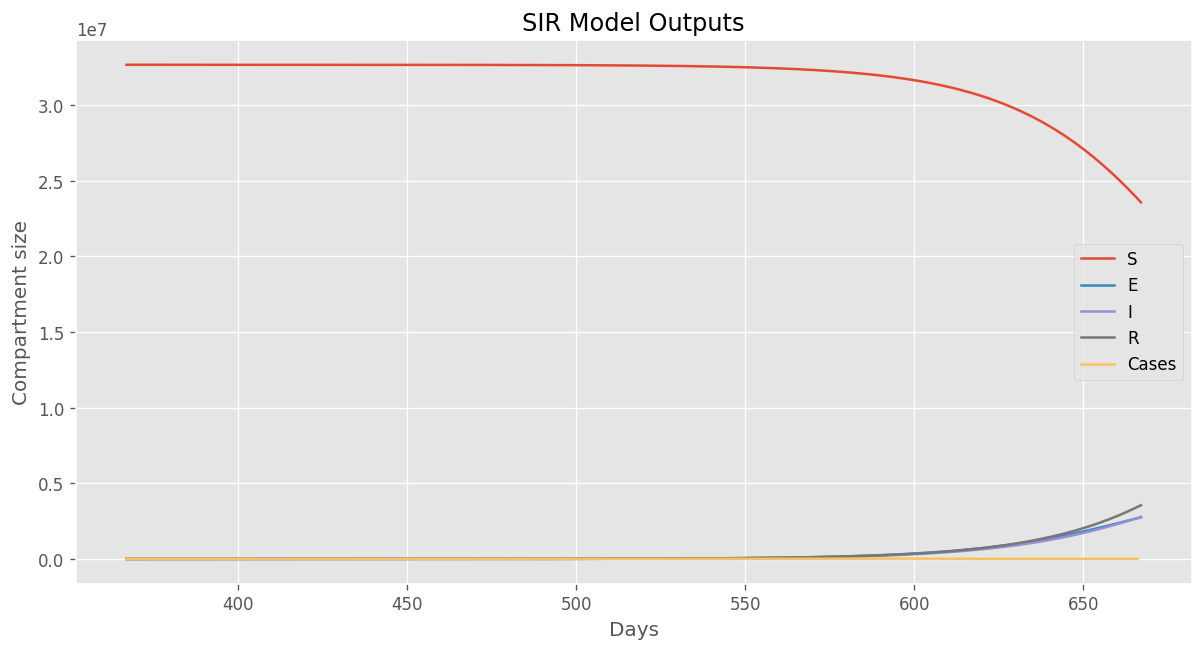

In [104]:
# Visualize the results.
subplot = {"title": "SIR Model Outputs", "xlabel": "Days", "ylabel": "Compartment size"}
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=120, subplot_kw=subplot)
for compartment_idx in range(model.outputs.shape[1]):
    ax.plot(model.times, model.outputs.T[compartment_idx])
ax.plot(xrange, target)

start, end = ax.get_xlim()
#ax.xaxis.set_ticks(np.arange(start + 1, end, 5))
ax.legend(["S", "E","I", "R","Cases"])
plt.show();


Now let's inspect each step of the example in more details. To start, here's how to create a new model: let's import the summer library and create a new [CompartmentalModel](/api/model.html) object. You can see that our model has an attribute called `compartments`, which contains a description of each modelled compartment.

In [40]:
# Define the model
model = CompartmentalModel(
    times=(START_DATE_INT, END_DATE_INT),
    compartments=["S", "E", "I", "R"],
    infectious_compartments=["I"],
    timestep=0.1,
)

## Adding a population 

Initially the model compartments are all empty. Let's add:

- 990 people to the susceptible (S) compartment, plus
- 10 in the infectious (I) compartment.

In [41]:
# Add people to the model
model.set_initial_population(distribution={"S": 100000, "E": 0, "I": 10})

# View the initial population
model.initial_population

array([100000.00, 0.00, 10.00, 0.00])

## Adding inter-compartmental flows 

Now, let's add some flows for people to transition between the compartments. These flows will define the dynamics of our infection. We will add:

- an infection flow from S to E (using frequency-dependent transmission)
- an exposed individual becomes infexted E to I.
- a recovery flow from I to R

In [42]:

# Susceptible people can get infected.
model.add_infection_frequency_flow(name="exposure", contact_rate=0.65, source="S", dest="E")

# Expose people transition to infected.
model.add_transition_flow(name="infection", fractional_rate=1/3, source="E", dest="I")

# Infectious people recover.
model.add_transition_flow(name="recovery", fractional_rate=0.2, source="I", dest="R")


# Inspect the new flows, which we just added to the model.
model._flows

[<InfectionFrequencyFlow 'exposure' from S to E>,
 <TransitionFlow 'infection' from E to I>,
 <TransitionFlow 'recovery' from I to R>]

## Running the model

Now we can calculate the outputs for the model over the requested time period. 
The model calculates the compartment sizes by solving a system of differential equations (defined by the flows we just added) over the requested time period.

In [43]:
model.run()

## Print the model outputs

The model's results are available in a NumPy array named `model.outputs`. 
This array is available after the model has been run. Let's have a look at what's inside:

In [44]:
# Force NumPy to format the output array nicely. 
import numpy as np
np.set_printoptions(formatter={'all': lambda f: f"{f:0.2f}"})

# View the first 25 timesteps of the output array.
model.outputs[:25]

array([[100000.00, 0.00, 10.00, 0.00],
       [99999.36, 0.63, 9.81, 0.20],
       [99998.72, 1.23, 9.65, 0.39],
       [99998.10, 1.81, 9.51, 0.58],
       [99997.49, 2.35, 9.39, 0.77],
       [99996.88, 2.87, 9.29, 0.96],
       [99996.28, 3.37, 9.21, 1.14],
       [99995.68, 3.84, 9.14, 1.33],
       [99995.09, 4.30, 9.10, 1.51],
       [99994.50, 4.74, 9.07, 1.69],
       [99993.91, 5.16, 9.05, 1.87],
       [99993.32, 5.57, 9.05, 2.05],
       [99992.74, 5.97, 9.06, 2.24],
       [99992.15, 6.35, 9.08, 2.42],
       [99991.55, 6.73, 9.12, 2.60],
       [99990.96, 7.09, 9.17, 2.78],
       [99990.36, 7.45, 9.23, 2.97],
       [99989.76, 7.79, 9.30, 3.15],
       [99989.15, 8.13, 9.37, 3.34],
       [99988.54, 8.47, 9.46, 3.53],
       [99987.92, 8.80, 9.56, 3.72],
       [99987.30, 9.13, 9.67, 3.91],
       [99986.67, 9.45, 9.78, 4.10],
       [99986.03, 9.77, 9.91, 4.30],
       [99985.38, 10.08, 10.04, 4.50]])

## Plot the outputs

You can get a better idea of what is going on inside the model by visualizing how the compartment sizes change over time.

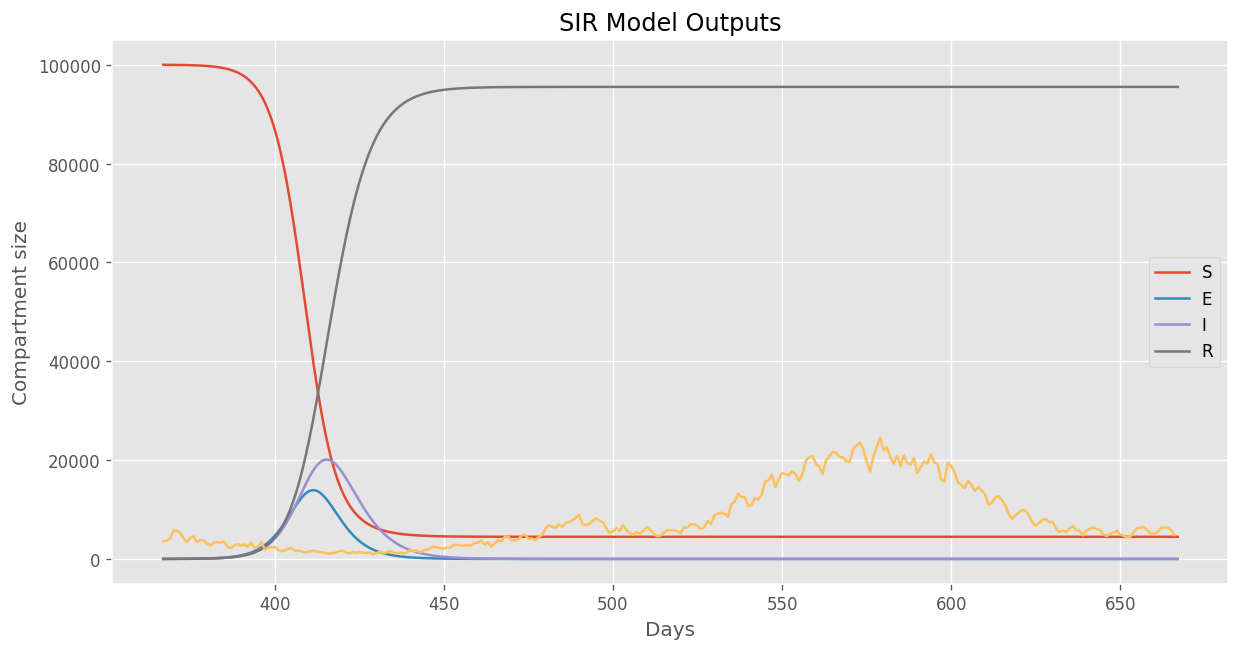

In [45]:
# Visualize the results.
subplot = {"title": "SIR Model Outputs", "xlabel": "Days", "ylabel": "Compartment size"}
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=120, subplot_kw=subplot)
for compartment_idx in range(model.outputs.shape[1]):
    ax.plot(model.times, model.outputs.T[compartment_idx])
ax.plot(xrange, target)

start, end = ax.get_xlim()
#ax.xaxis.set_ticks(np.arange(start + 1, end, 5))
ax.legend(["S", "E","I", "R"])
plt.show();

## Summary

That's it for now, now you know how to:

- Create a model
- Add a population
- Add flows
- Run the model
- Access and visualize the outputs

A detailed API reference for the CompartmentalModel class can be found [here](http://summerepi.com/api/model.html)

## Bonus: how the model works inside

This section presents a code snippet that shows an approximation of what is happening inside the model we just built and ran.

In the example code below we use the [Euler method](https://en.wikipedia.org/wiki/Euler_method) to solve an ordinary differential equation (ODE) which is defined by the model's flows. We don't actually use Euler in Summer though, you can read more about the actual ODE solvers available to evaluate models [here](http://summerepi.com/examples/4-ode-solvers.html).

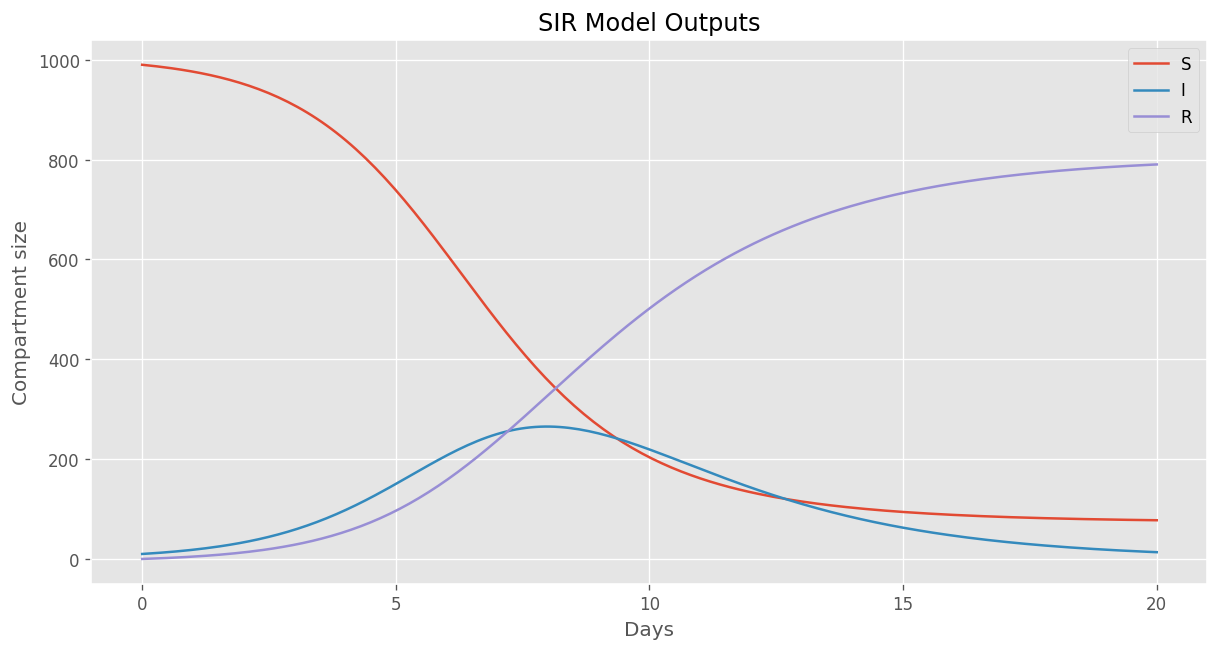

In [46]:
import numpy as np
import matplotlib.pyplot as plt

TIMESTEP = 0.1
START_TIME = 0
END_TIME = 20

# Get times
time_period = END_TIME - START_TIME + 1
num_steps = time_period / TIMESTEP
times = np.linspace(START_TIME, END_TIME, num=int(num_steps))

# Define initial conditions
initial_conditions = np.array([990.0, 10.0, 0.0])  # S, I, R

# Define outputs
outputs = np.zeros((int(num_steps), 3))
outputs[0] = initial_conditions

# Model parameters
contact_rate = 1.0
sojourn_time = 3.0
death_rate = 0.05

# Calculate outputs for each timestep
for t_idx, t in enumerate(times):
    if t_idx == 0:
        continue

    flow_rates = np.zeros(3)
    compartment_sizes = outputs[t_idx - 1 ]

    # Susceptible people can get infected (frequency-dependent).
    num_sus = compartment_sizes[0]
    num_inf = compartment_sizes[1]
    num_pop = compartment_sizes.sum()
    force_of_infection = contact_rate * num_inf / num_pop
    infection_flow_rate = force_of_infection * num_sus
    flow_rates[0] -= infection_flow_rate
    flow_rates[1] += infection_flow_rate

    # Infectious take some time to recover.
    num_inf = compartment_sizes[1]
    recovery_flow_rate = num_inf / sojourn_time
    flow_rates[1] -= recovery_flow_rate
    flow_rates[2] += recovery_flow_rate
    
    # Add an infection-specific death flow to the I compartment.
    num_inf = compartment_sizes[1]
    recovery_flow_rate = num_inf * death_rate
    flow_rates[1] -= recovery_flow_rate
    
    # Calculate compartment sizes at next timestep given flowrates.
    outputs[t_idx] = compartment_sizes + flow_rates * TIMESTEP  
    
# Plot the results as a function of time for S, I, R respectively.
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=120)

# Add each compartment to the plot.
for i in range(outputs.shape[1]):
    ax.plot(times, outputs.T[i])

ax.set_title("SIR Model Outputs")
ax.set_xlabel("Days")
ax.set_ylabel("Compartment size")
ax.legend(["S", "I", "R"])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start + 1, end, 5))
plt.show();